In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [60]:
df=pd.read_csv("data.csv",encoding="latin1",low_memory=False)
df.columns=df.columns.str.strip().str.lower()
df.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [59]:
no2_series=pd.to_numeric(df["no2"], errors="coerce").dropna()
x_data=no2_series.to_numpy()
print("Total NO2 samples:", len(x_data))

Total NO2 samples: 419509


In [62]:
roll_no=102317160
alpha=0.05*(roll_no%7)
beta=0.3*((roll_no%5)+1)

print("aplha values:", alpha)
print("beta values:", beta)

aplha values: 0.05
beta values: 0.3


In [63]:
z=x_data+alpha*np.sin(beta*x_data)
z

array([17.35630459,  7.04316047, 28.53837006, ..., 45.04018922,
       50.03251439, 46.04718478])

In [64]:
hist_vals, bins=np.histogram(z, bins=50, density=True)
mid_points=(bins[1:]+bins[:-1])/2

hist_vals, bins, mid_points

(array([2.09620480e-02, 2.46250557e-02, 7.59501594e-03, 2.35351745e-03,
        8.16662528e-04, 3.65334703e-04, 1.80286213e-04, 8.55849267e-05,
        3.60572426e-05, 2.08179551e-05, 1.08852053e-05, 8.98029438e-06,
        4.49014719e-06, 2.58523626e-06, 3.53769172e-06, 2.58523626e-06,
        9.52455464e-07, 1.22458560e-06, 1.36065066e-07, 9.52455464e-07,
        9.52455464e-07, 9.52455464e-07, 1.36065066e-07, 1.36065066e-07,
        1.36065066e-07, 4.08195199e-07, 0.00000000e+00, 2.72130133e-07,
        0.00000000e+00, 0.00000000e+00, 1.36065066e-07, 0.00000000e+00,
        0.00000000e+00, 2.72130133e-07, 0.00000000e+00, 0.00000000e+00,
        1.36065066e-07, 0.00000000e+00, 0.00000000e+00, 1.36065066e-07,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.36065066e-07]),
 array([  0.        ,  17.51911163,  35.03822326,  52.55733489,
         70.07644652,  87.5955

In [76]:
def pdf_func(z,lmb,mean):
    c=np.sqrt(lmb/np.pi)
    return c*np.exp(-lmb*(z-mean)**2)

In [83]:
mean0=np.mean(z)
var0=np.var(z)
lmb0=1/(2*var0)

mean0, var0, lmb0

(25.80791010190818, 342.3744179182652, 0.0014603894854064846)

In [84]:
opti_params,_=curve_fit(
    pdf_func,
    mid_points,
    hist_vals,
    p0=[lmb0,mean0],
    bounds=([1e-12, -np.inf], [np.inf, np.inf])
)
lmb_hat, mu_hat=opti_params
c_hat=np.sqrt(lmb_hat/np.pi)

lmb_hat, c_hat

(0.002257968686094241, 0.02680921027328521)

In [85]:
print("\nEstimated Distribution Parameters")
print("Lambda:",round(lmb_hat,6))
print("Mu:",round(mu_hat,6))
print("c:",round(c_hat,6))


Estimated Distribution Parameters
Lambda: 0.002258
Mu: 19.789421
c: 0.026809


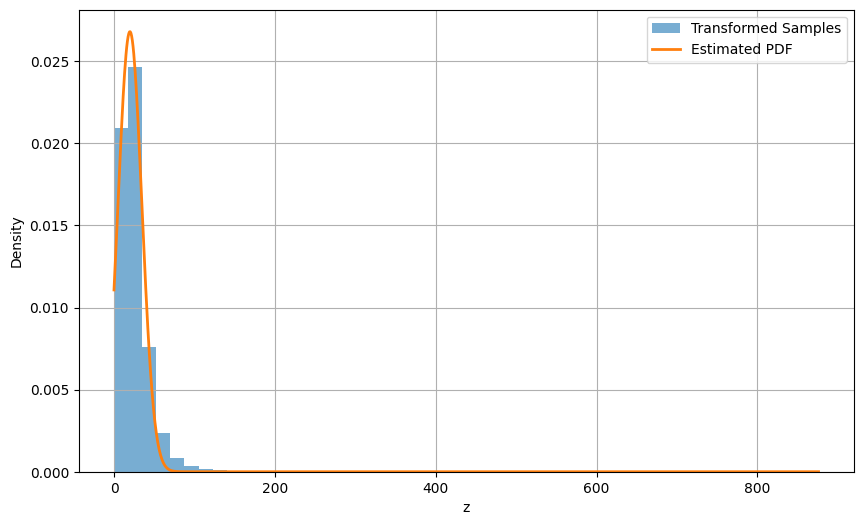

In [86]:
z_range=np.linspace(np.min(z),np.max(z),1000)
pdf_vals=pdf_func(z_range,lmb_hat,mu_hat)

plt.figure(figsize=(10,6))
plt.hist(z,bins=50,density=True,alpha=0.6,label="Transformed Samples")
plt.plot(z_range,pdf_vals,linewidth=2,label="Estimated PDF")
plt.xlabel("z")
plt.ylabel("Density")
plt.legend()
plt.grid(True)